In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = 'https://www.eltiempo.com/noticias/israel'
response = requests.get(url)
html = response.text

soup = BeautifulSoup(html, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [5]:
israel = soup.find('h1')
israel

<h1 class="titulo">Israel</h1>

In [9]:
titulo = soup.find('h1', class_='titulo')

for ti in titulo:
    print(titulo.text)

Israel


In [12]:
titulares = []
links = soup.select('a')


for ahref in links:
    text = ahref.text
    text = text.strip() if text is not None else ''
    href = ahref.get('href')
    href = href.strip() if href is not None else ''
    titulares.append({"href": href, "text": text})
    print(titulares)

[{'href': 'https://www.eltiempo.com/politica/gobierno/reforma-laboral-los-ajustes-que-el-presidente-gustavo-petro-les-pidio-a-los-ponentes-834262', 'text': 'CAPTURAN A HáROLD ECHEVERRY PRESUNTO FEMINICIDA DE MICHEL DAYANA'}]
[{'href': 'https://www.eltiempo.com/politica/gobierno/reforma-laboral-los-ajustes-que-el-presidente-gustavo-petro-les-pidio-a-los-ponentes-834262', 'text': 'CAPTURAN A HáROLD ECHEVERRY PRESUNTO FEMINICIDA DE MICHEL DAYANA'}, {'href': 'https://www.eltiempo.com/bogota/metro-de-bogota-detalles-de-las-obras-de-la-primera-linea-asi-se-vera-el-megaproyecto-831215', 'text': 'PRIMERA LíNEA DEL METRO DE BOGOTá'}]
[{'href': 'https://www.eltiempo.com/politica/gobierno/reforma-laboral-los-ajustes-que-el-presidente-gustavo-petro-les-pidio-a-los-ponentes-834262', 'text': 'CAPTURAN A HáROLD ECHEVERRY PRESUNTO FEMINICIDA DE MICHEL DAYANA'}, {'href': 'https://www.eltiempo.com/bogota/metro-de-bogota-detalles-de-las-obras-de-la-primera-linea-asi-se-vera-el-megaproyecto-831215', 'text

In [20]:
df = pd.DataFrame(titulares)
df.head(2)

href  \
0  https://www.eltiempo.com/politica/gobierno/ref...   
1  https://www.eltiempo.com/bogota/metro-de-bogot...   

                                                text  
0  CAPTURAN A HáROLD ECHEVERRY PRESUNTO FEMINICID...  
1                  PRIMERA LíNEA DEL METRO DE BOGOTá

In [21]:
df = df.rename(columns={'href': 'Enlaces'})
df = df.rename(columns={'text': 'Titulares'})
df.head()

Enlaces  \
0  https://www.eltiempo.com/politica/gobierno/ref...   
1  https://www.eltiempo.com/bogota/metro-de-bogot...   
2  https://www.eltiempo.com/unidad-investigativa/...   
3  https://www.eltiempo.com/economia/sectores/sal...   
4  https://www.eltiempo.com/unidad-investigativa/...   

                                           Titulares  
0  CAPTURAN A HáROLD ECHEVERRY PRESUNTO FEMINICID...  
1                  PRIMERA LíNEA DEL METRO DE BOGOTá  
2                              NóMINA DE MINHACIENDA  
3               PROYECCIONES DEL SALARIO MíNIMO 2024  
4                  CASO PASAPORTES EN LA CANCILLERíA

In [22]:
df['Titulares'] = df['Titulares'].str.lower()
df.head()

Enlaces  \
0  https://www.eltiempo.com/politica/gobierno/ref...   
1  https://www.eltiempo.com/bogota/metro-de-bogot...   
2  https://www.eltiempo.com/unidad-investigativa/...   
3  https://www.eltiempo.com/economia/sectores/sal...   
4  https://www.eltiempo.com/unidad-investigativa/...   

                                           Titulares  
0  capturan a hárold echeverry presunto feminicid...  
1                  primera línea del metro de bogotá  
2                              nómina de minhacienda  
3               proyecciones del salario mínimo 2024  
4                  caso pasaportes en la cancillería

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Enlaces    323 non-null    object
 1   Titulares  323 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB


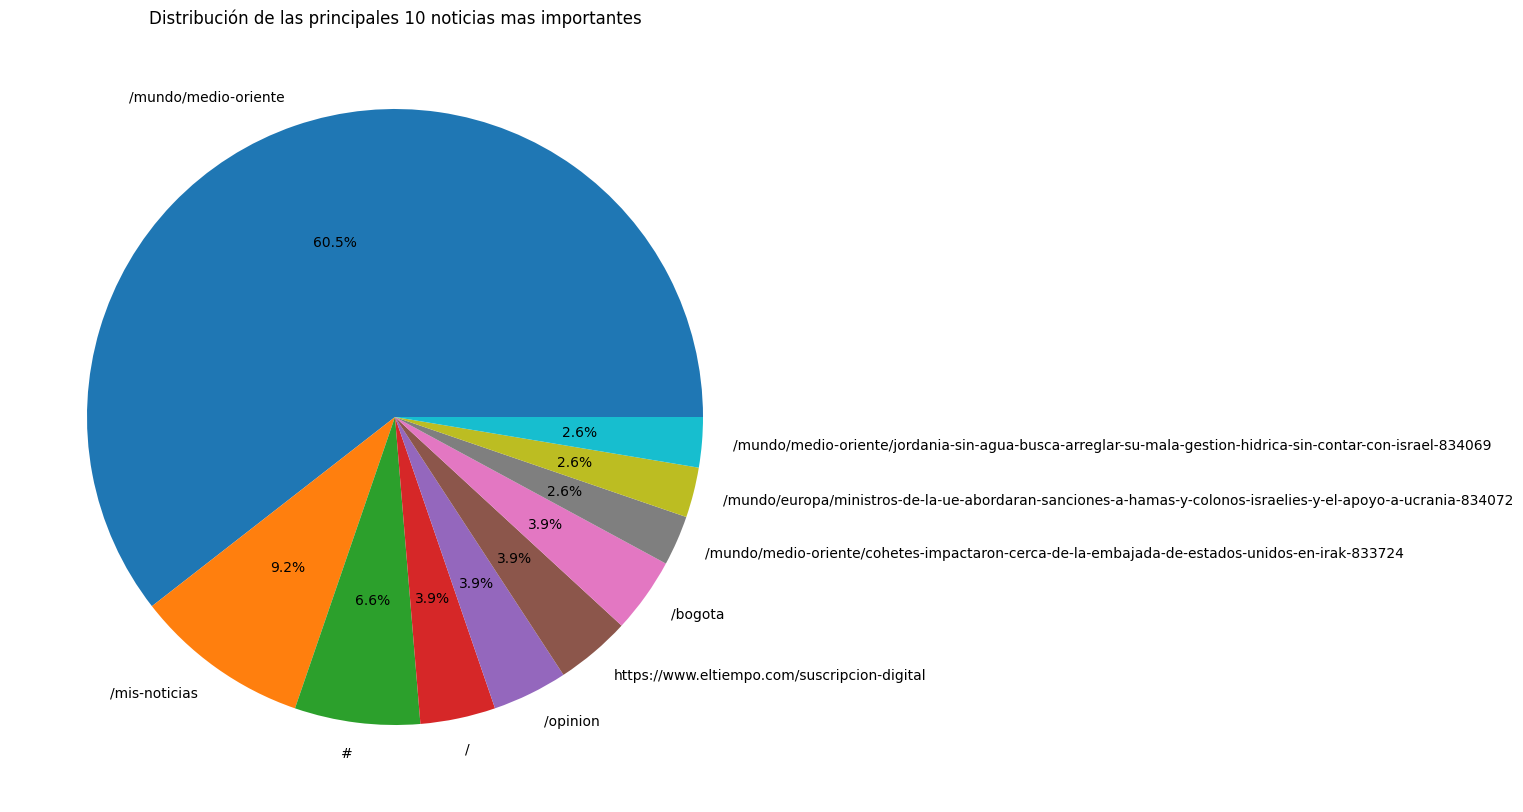

In [46]:
enlaces = df['Enlaces'].value_counts()

num_categories = 10
top_categories = enlaces.head(num_categories)

plt.figure(figsize=(10, 10))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
plt.title('Distribución de las principales 10 noticias mas importantes')
plt.show()